# Fast Food Marketing Campaign: A/B Testing

A fast-food chain is planning to introduce a new menu item but is undecided between three possible marketing campaigns to promote it. To determine which promotion has the most impact on sales, the chain tested each promotion in randomly selected markets. The sales of the new item were recorded weekly over a four-week period at each location.

The objective is to analyze the A/B testing results and identify which marketing strategy performs best, with statistically significant differences across the test groups.

In this analysis, I will focus on examining the distribution of various features in the dataset to ensure that the attributes of each promotion group are evenly distributed. This step is crucial to ensure the fairness and accuracy of the A/B test results. Let’s begin by loading the necessary libraries and data to check the distributions.


In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("WA_Marketing-Campaign.csv", encoding='ISO-8859-1')  # or encoding='latin1'
data.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [18]:
data.shape

(548, 7)

## Promotions Distribution

In [3]:
promotion_counts = data.Promotion.value_counts(normalize=True)*100
promotion_counts

Promotion
3    34.306569
2    34.306569
1    31.386861
Name: proportion, dtype: float64

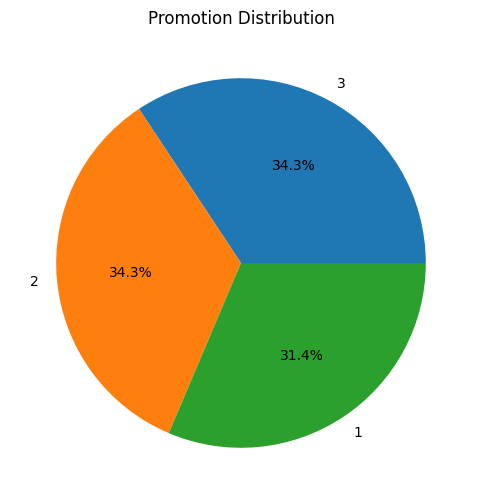

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.pie(promotion_counts, labels=promotion_counts.index, autopct='%1.1f%%')
plt.title('Promotion Distribution')
plt.show()

From the chart, we can see that promotion groups 2 and 3 have the highest aggregate sales, accounting for 34.3% of total sales. However, each promotion group contributes approximately one-third of the overall sales during the promotion period.

Next, let’s explore the market sizes associated with each promotion group.

## Market sizes

Text(0.5, 1.0, 'Market size across different promotions')

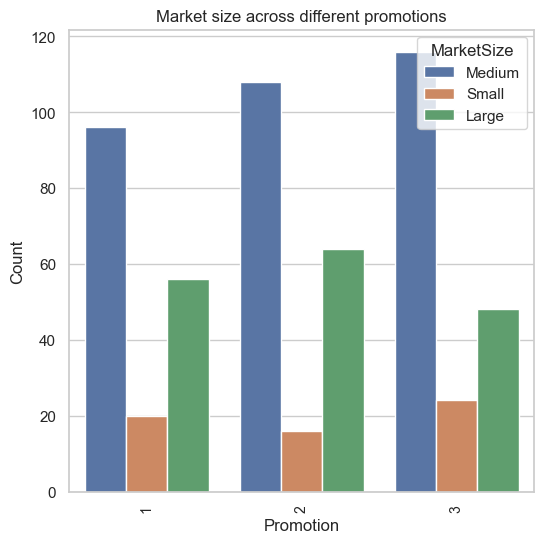

In [6]:

import seaborn as sns

plt.figure(figsize = (6,6))
sns.countplot(x = 'Promotion', hue = 'MarketSize', data = data)

sns.set(style='whitegrid')
plt.xlabel('Promotion')
plt.ylabel('Count')
plt.xticks(fontsize=10, rotation = 90)
plt.title('Market size across different promotions')

Here we see that the medium market size occupies the most among all three promotion groups, while the small market size occupies the least.

## Store Age Profiles and Group Comparability

Text(0.5, 1.0, 'Age of Store Distribution')

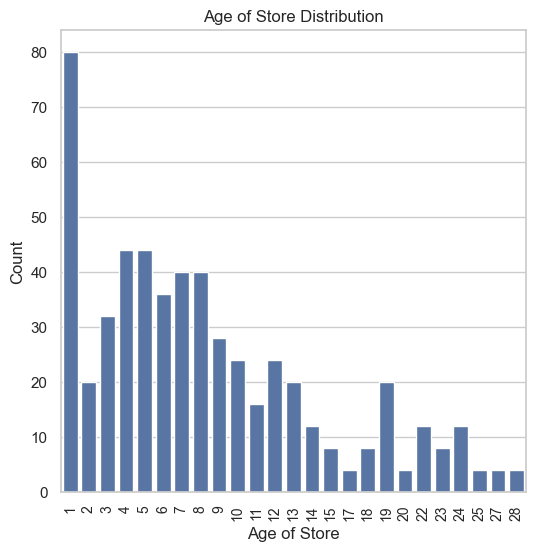

In [9]:
import seaborn as sns

plt.figure(figsize = (6,6))
sns.countplot(x = 'AgeOfStore', data = data)

sns.set(style='whitegrid')
plt.xlabel('Age of Store')
plt.ylabel('Count')
plt.xticks(fontsize=10, rotation = 90)
plt.title('Age of Store Distribution')

The majority of stores are 10 years old or less. A large number of stores are 1 year old.

In [13]:
def q1(x):
    return x.quantile(0.25)

def q3(x):
    return x.quantile(0.75)

data.groupby("Promotion")["AgeOfStore"].agg(['mean', 'median', 'min', 'max', q1, q3])

,mean,median,min,max,q1,q3
Promotion,,,,,,
1,8.279070,6.0,1,27,3.0,12.0
2,7.978723,7.0,1,28,3.0,10.0
3,9.234043,8.0,1,24,5.0,12.0



We observe that all three promotion groups have similar store age profiles. The average store age (**mean**) for the three groups is around 8–9 years, with most stores being between 10–12 years old or younger.

After analyzing the distribution of variables within the promotion groups, I can confirm that the sample groups are comparable, ensuring that the A/B testing results are valid and reliable.

## Hypothesis Testing

As previously mentioned, it is essential to test our hypothesis and determine if there are statistically significant differences between the test groups in A/B testing. The **t-test** is commonly used for this purpose, as it compares the averages and assesses whether they differ significantly from one another.

In a t-test, two key statistics are calculated: the **t-value** and the **p-value**:

- The **t-value** reflects how much the groups differ relative to the variability within the groups. A higher t-value indicates a greater difference between the groups.
- The **p-value** measures the likelihood that the observed difference occurred by chance. A smaller p-value indicates greater statistical significance.

The hypothesis test involves the **null hypothesis** and the **alternative hypothesis**:

- The **null hypothesis** asserts that there is no statistically significant difference between the two groups.
- The **alternative hypothesis** claims that there is a statistically significant difference between the two groups.

## Computing the t-value and p-value

To calculate the t-value, we need three components: the **mean**, the **standard deviation**, and the **sample size** for each group.

In our case (with data shape `548, 7`), the **t-test** is more appropriate because we do not know the population standard deviation. The t-test compensates for this by using the sample standard deviation. If we had the population standard deviation or were working with very large samples (where we could assume normality), we could consider using the **z-test** instead.


## A/B Test: Promotion 1 vs. 2

In [17]:
promo_1 = data[data['Promotion'] == 1]['SalesInThousands']
promo_1

8      44.54
9      37.94
10     45.49
11     34.75
24     42.92
       ...  
539    61.63
540    59.87
541    62.99
542    57.20
543    64.34
Name: SalesInThousands, Length: 172, dtype: float64

In [21]:
from scipy import stats

promo_1 = data[data['Promotion'] == 1]['SalesInThousands']
promo_2 = data[data['Promotion'] == 2]['SalesInThousands']
promo_3 = data[data['Promotion'] == 3]['SalesInThousands']


#mean
mean_1 = promo_1.mean()
mean_2 = promo_2.mean()
mean_3 = promo_3.mean()


#standard deviation
std_1 = promo_1.std()
std_2 = promo_2.std()
std_3 = promo_3.std()


t_statistic, p_value = stats.ttest_ind(promo_1, promo_2)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05


if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

T-statistic: 6.453671702181005
P-value: 3.5506696512134566e-10
Reject the null hypothesis. There is a significant difference.


In [22]:
if mean_1 > mean_2:
    print(f"Promotion 1 outperformed Promotion 2 with mean sales of {mean_1} compared to {mean_2}.")
else:
    print(f"Promotion 2 outperformed Promotion 1 with mean sales of {mean_2} compared to {mean_1}.")


Promotion 1 outperformed Promotion 2 with mean sales of 58.09901162790698 compared to 47.32941489361701.


The results indicate strong evidence against the null hypothesis, showing a significant difference between Promotion 1 and Promotion 2. Additionally, Promotion 1 has outperformed Promotion 2.


## A/B Test: Promotion 1 vs. 3

In [23]:
t_statistic, p_value = stats.ttest_ind(promo_1, promo_3)

print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

alpha = 0.05


if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference.")

T-statistic: 1.5551383687293547
P-value: 0.12079667272313277
Fail to reject the null hypothesis. There is no significant difference.


In [24]:
if mean_1 > mean_3:
    print(f"Promotion 1 outperformed Promotion 3 with mean sales of {mean_1} compared to {mean_3}.")
else:
    print(f"Promotion 3 outperformed Promotion 1 with mean sales of {mean_3} compared to {mean_1}.")


Promotion 1 outperformed Promotion 3 with mean sales of 58.09901162790698 compared to 55.36446808510639.


The results suggest that there is no statistically significant difference between Promotion 1 and Promotion 3, even though the average sales for Promotion 1 (58.1) are higher than those for Promotion 3 (55.36).

From this analysis, I conclude that Promotion 1 and Promotion 3 perform better than Promotion 2. However, the difference between Promotion 1 and Promotion 3 is not statistically significant. Therefore, the company can confidently implement either Promotion 1 or Promotion 3 for their fast-food retail chain.